In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [2]:
def display_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]

    proc_group = groups['data'][0]
    ax = axes[0]
    ax.set_title(proc_group['name'])
    for bench in proc_group['data']:
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
    ax.legend()

    matrix_group = groups['data'][1]
    ax = axes[1]
    ax.set_title(matrix_group['name'])
    for bench in matrix_group['data']:
        x = [run['matrix_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['processor_size'])]))
        #ax.set_yscale('log',base=2)
    ax.legend()

In [3]:
def display_processor_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]
    ax_num = 0

    for group in groups['data']:
        ax = axes[ax_num]
        ax.set_title(group['name'])
        for bench in group['data']:
            x = [run['processor_size'] for run in bench['data']]
            y = [run['mean'] for run in bench['data']]
            yerr = [run['std'] for run in bench['data']]
            ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
        ax.legend()
        ax_num += 1

In [4]:
def display_relative_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]

    proc_group = groups['data'][0]
    ax = axes[0]
    ax.set_title(proc_group['name'])
    base = proc_group['data'][0]
    for bench in proc_group['data'][1:]:
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] - brun['mean'] for run,brun in zip(bench['data'], base['data'])]
        ax.plot(x,y, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
    ax.legend()

    matrix_group = groups['data'][1]
    ax = axes[1]
    base = matrix_group['data'][0]
    for bench in matrix_group['data'][1:]:
        x = [run['matrix_size'] for run in bench['data']]
        y = [run['mean'] - brun['mean'] for run,brun in zip(bench['data'], base['data'])]
        ax.plot(x,y, label=" ".join([bench['name'], str(bench['data'][0]['processor_size'])]))
        #ax.set_yscale('log',base=2)
    ax.legend()

# Thread Time

## Local Runs

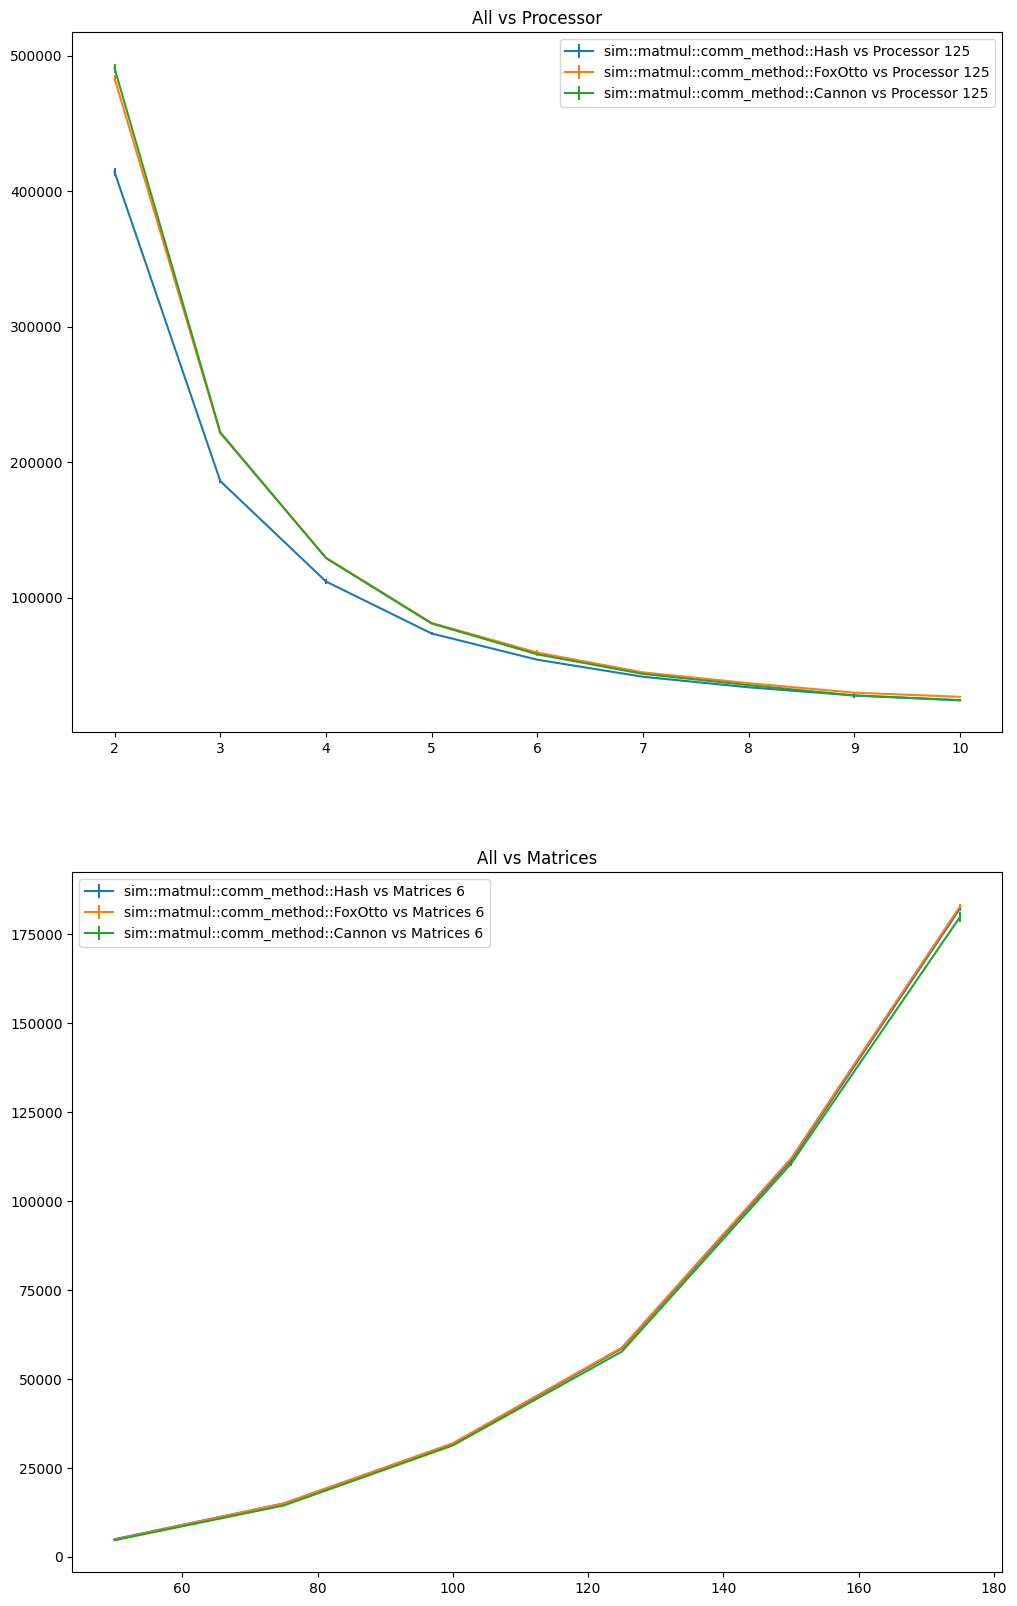

In [17]:
display_benchmark("thread_time/data_local1.json")

## Remote Runs

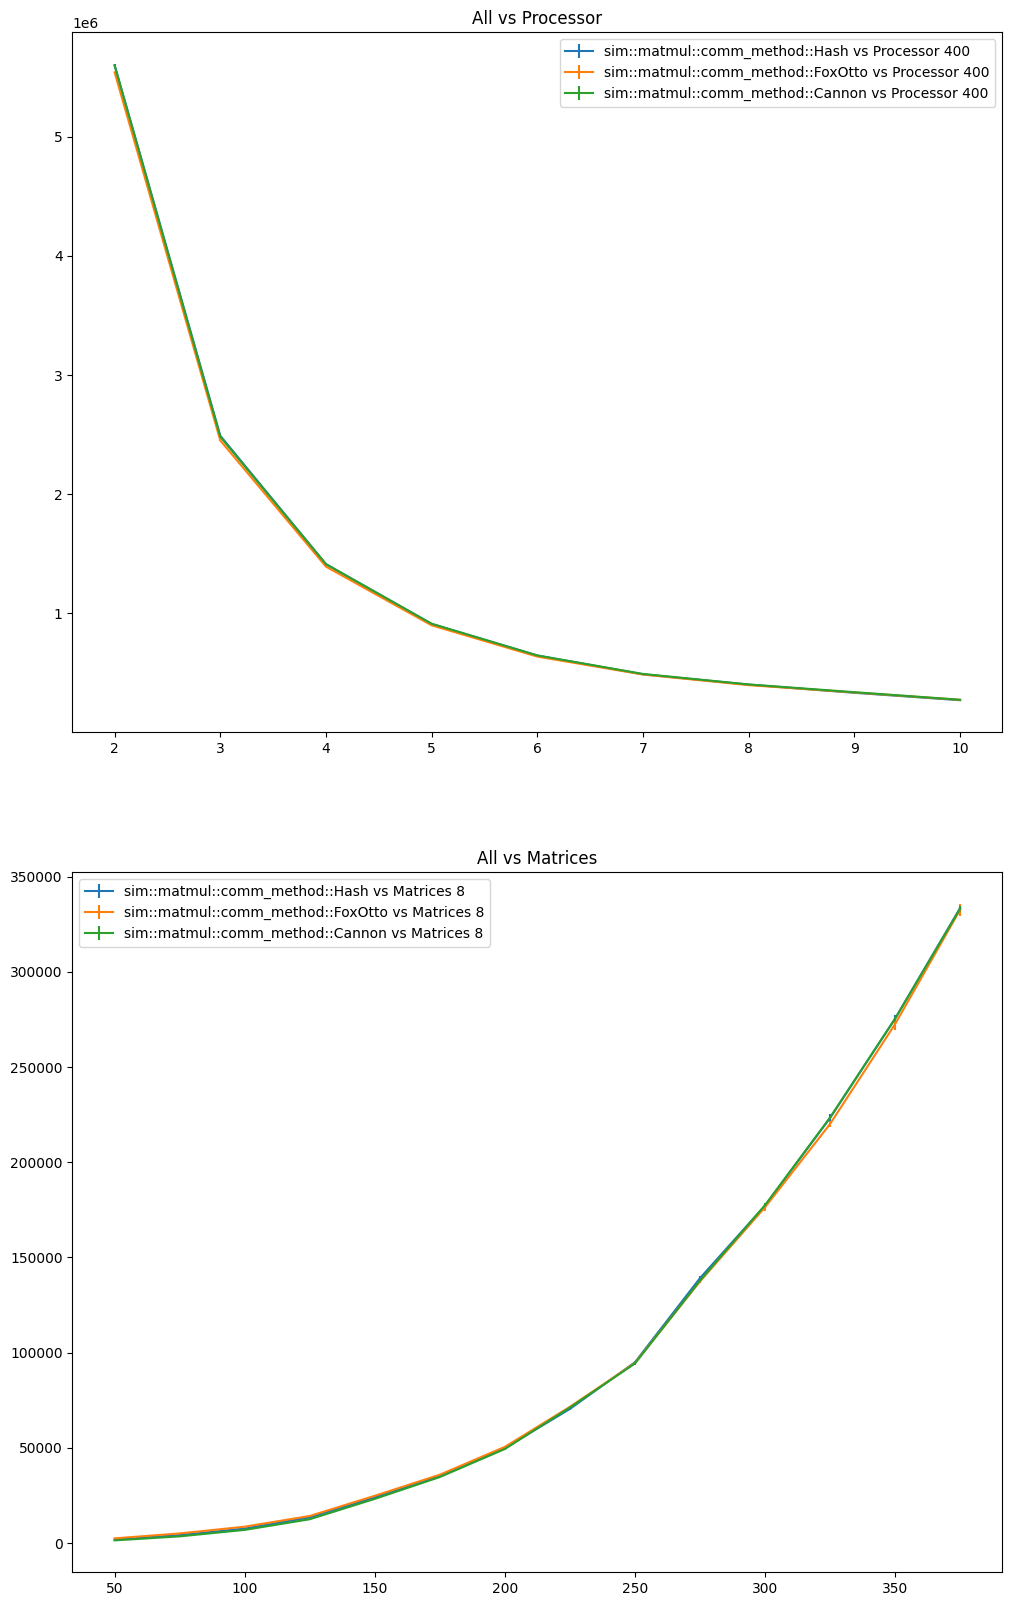

In [12]:
display_benchmark("thread_time/data_remote1.json")

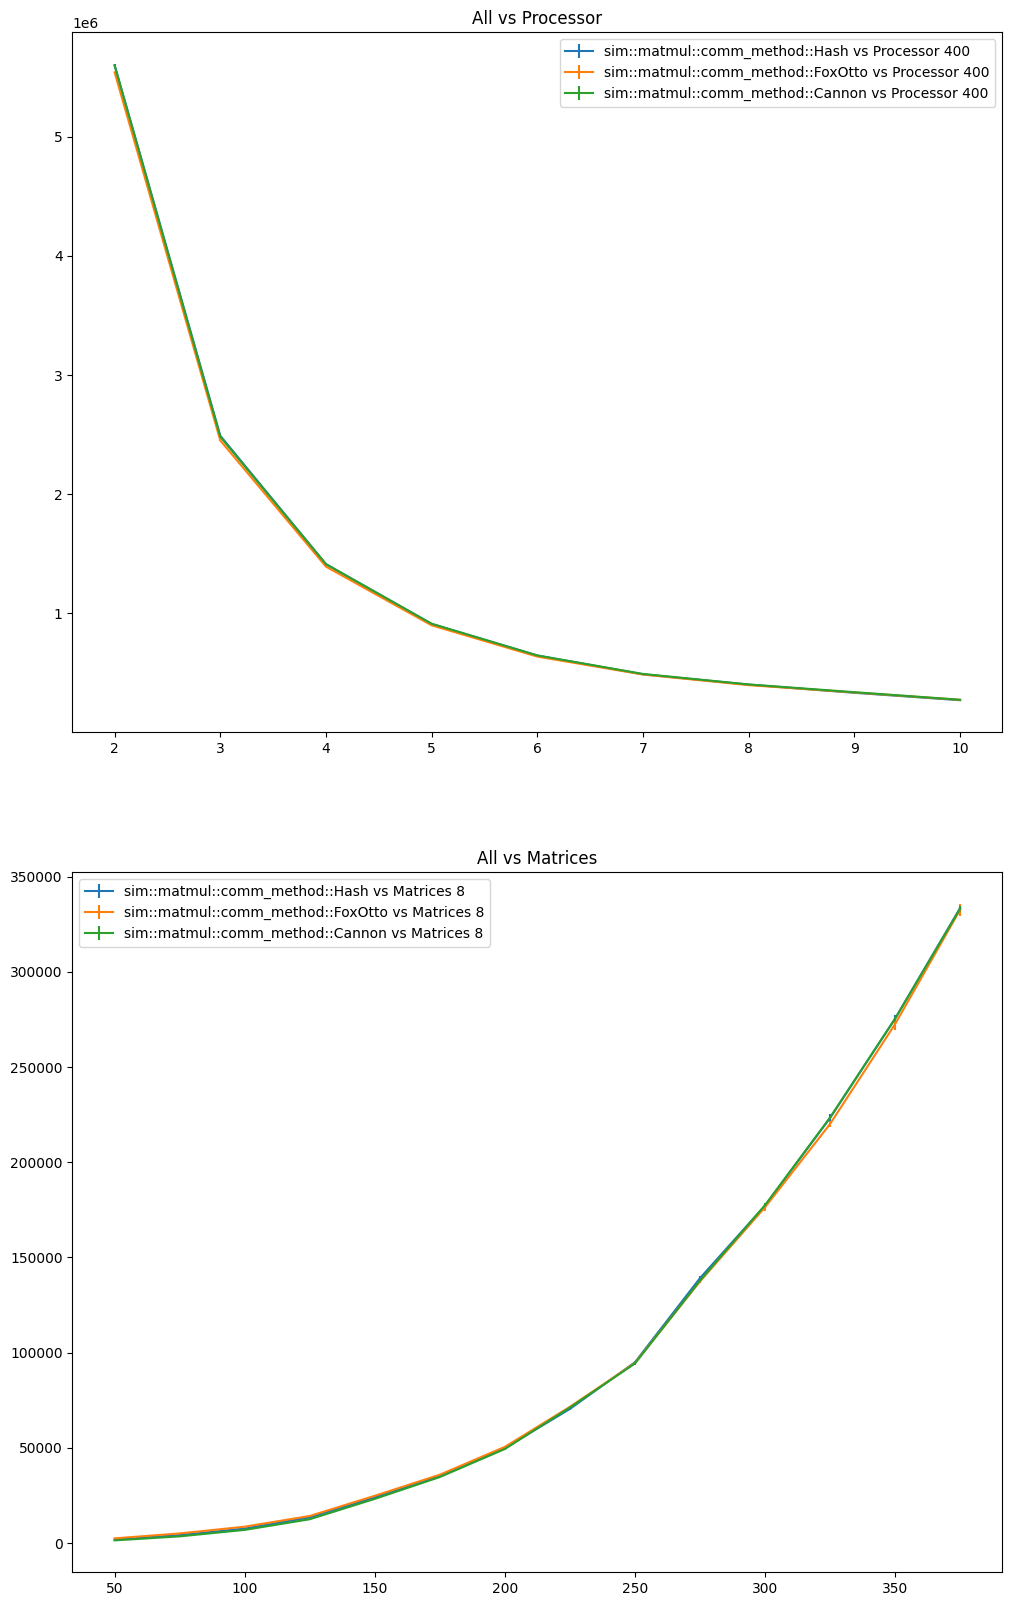

In [13]:
display_benchmark("thread_time/data_remote2.json")

# Wallclock Time

## Local Runs

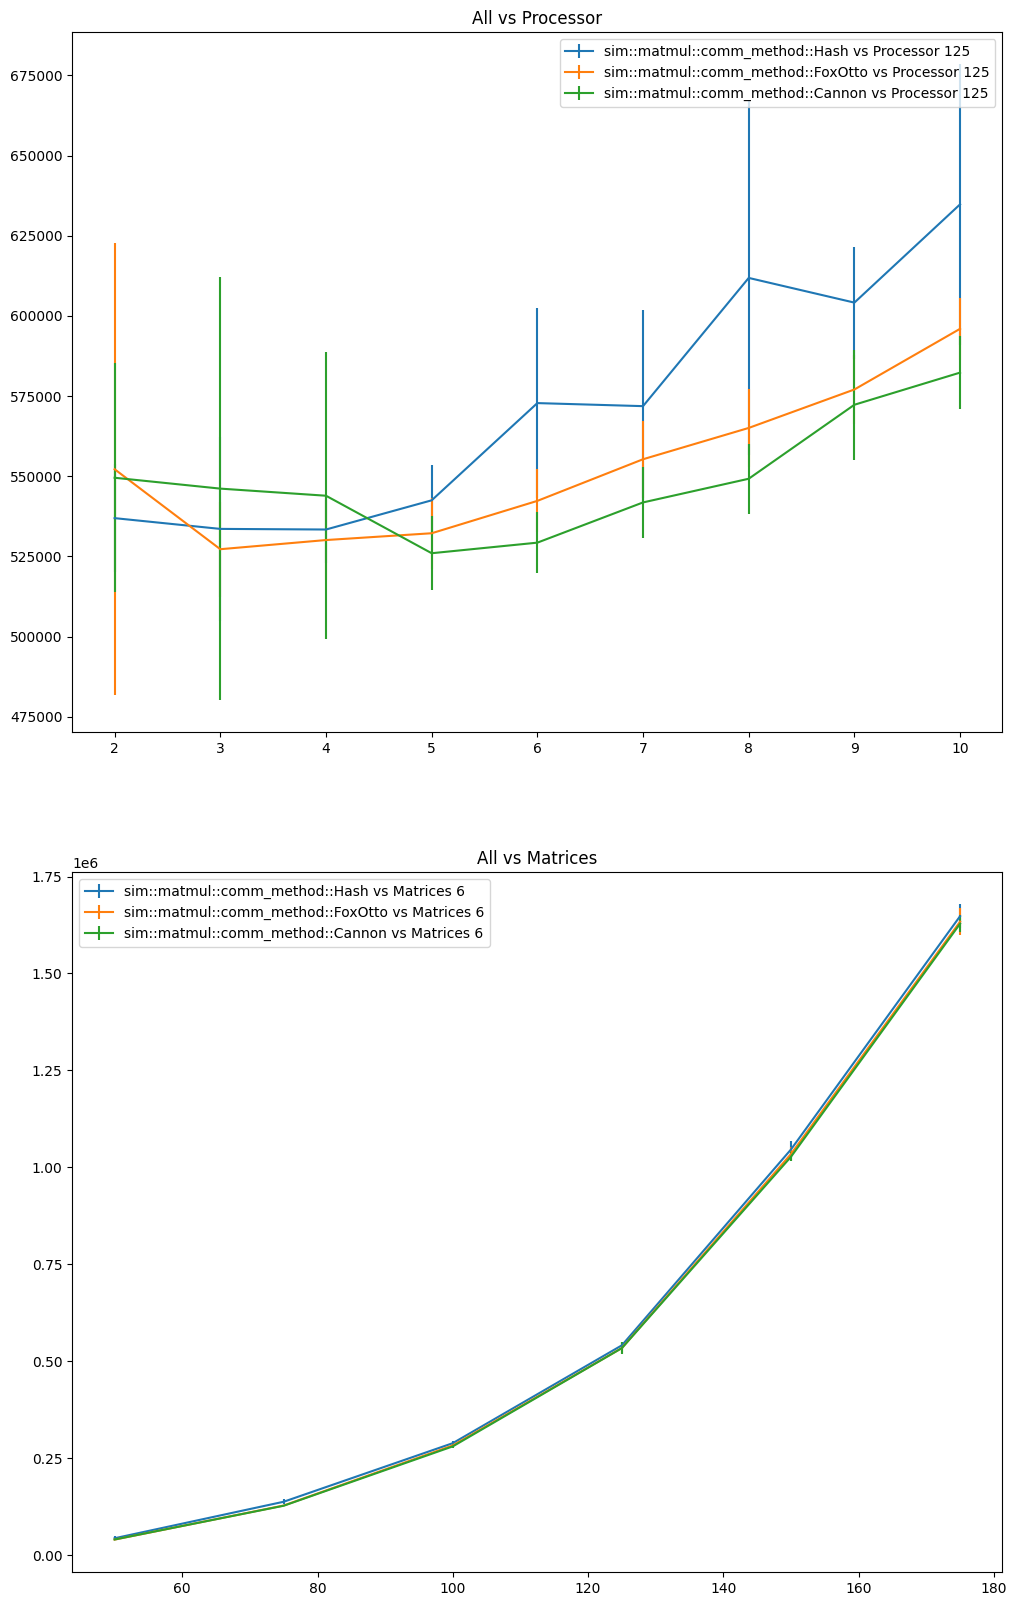

In [18]:
display_benchmark("wall_time/data_local1.json")

## Remote Runs

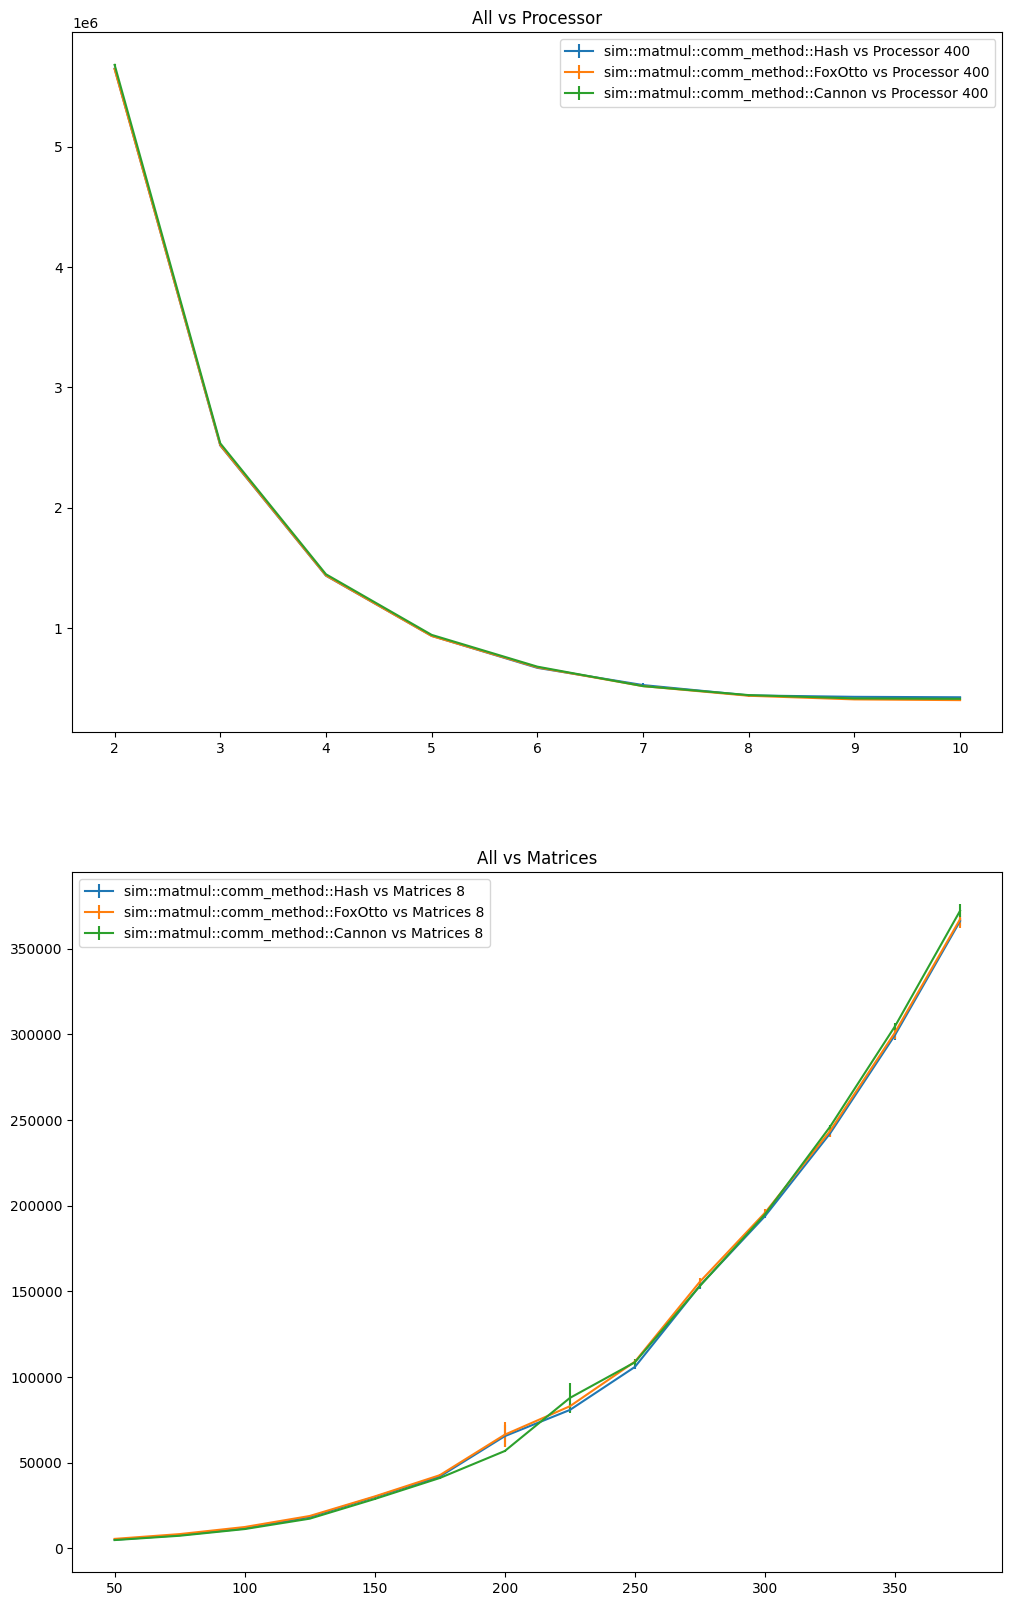

In [20]:
display_benchmark("wall_time/data_remote1.json")

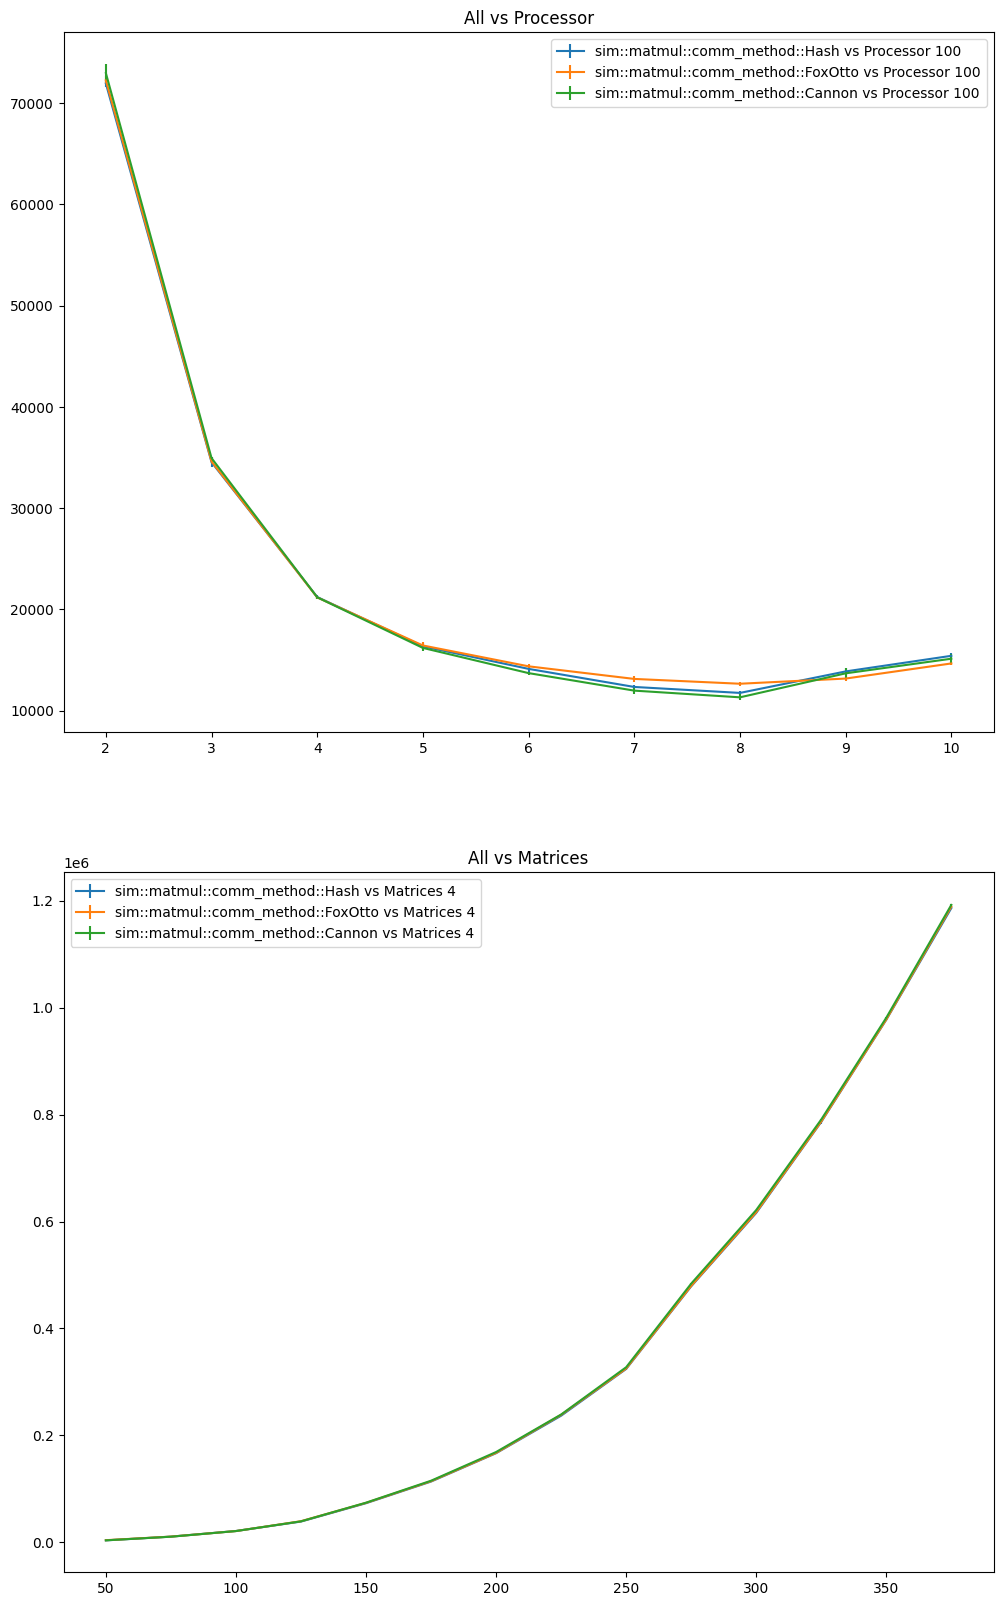

In [21]:
display_benchmark("wall_time/data_remote2.json")

# Speedup

In [48]:
with open('../data.json')as file:
    groups = json.load(file)

In [50]:
Hash = []
for group in groups['data']:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
            Hash.append(bench['data'])

FoxOtto = []
for group in groups['data']:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
            FoxOtto.append(bench['data'])

Cannon = []
for group in groups['data']:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
            Cannon.append(bench['data'])

In [51]:
relativeFoxOtto = []
for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
    relativeBench = []
    for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
        relativeBench.append(relativeRun)
    relativeFoxOtto.append(relativeBench)

relativeCannon = []
for benchHash, benchCannon in zip(Hash, Cannon):
    relativeBench = []
    for runHash, runCannon in zip(benchHash, benchCannon):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
        relativeBench.append(relativeRun)
    relativeCannon.append(relativeBench)
relative = [relativeFoxOtto, relativeCannon]

In [52]:
for relativeComm in relative:
    for bench in relativeComm:
        for run in bench:
            run['std'] = np.std(np.array(run['data']))
            run['mean'] = np.mean(np.array(run['data']))

In [ ]:
relative

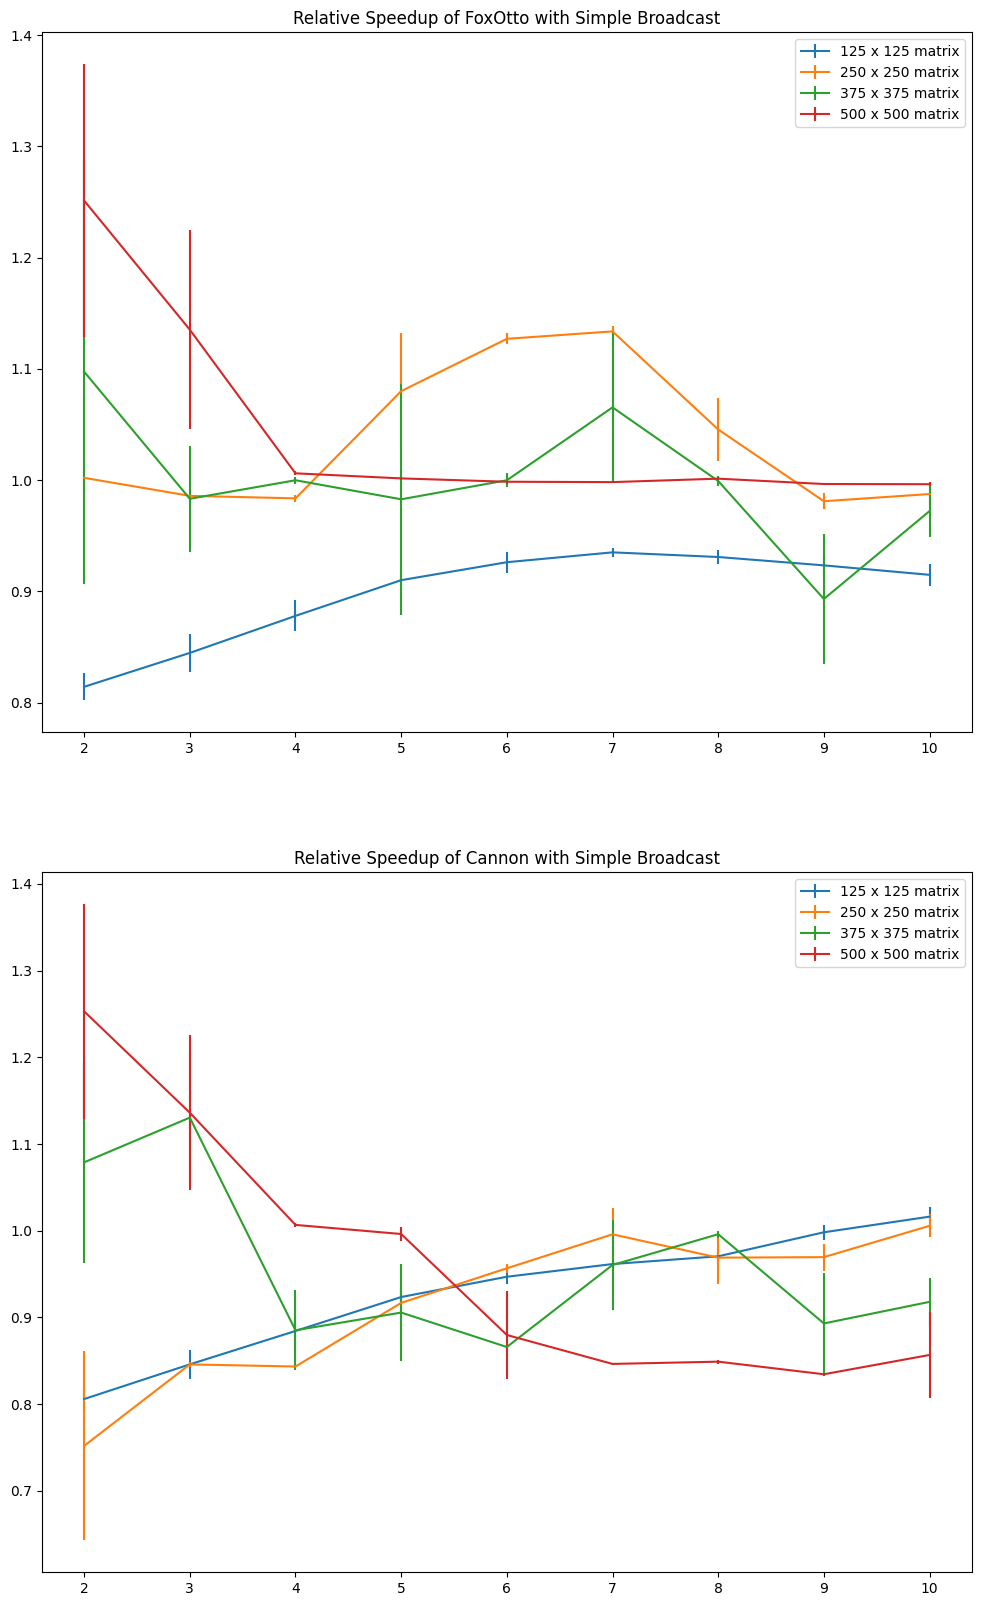

In [54]:
fig, axes = plt.subplots(len(relative), 1)
fig.set_size_inches(12, 10 * len(relative))

if len(groups['data']) == 1:
    axes = [axes]

ax_num = 0

for relativeComm, name in zip(relative, ['FoxOtto','Cannon']):
    ax = axes[ax_num]
    ax.set_title('Relative Speedup of {} with Simple Broadcast'.format(name))
    for bench in relativeComm:
        x = [run['processor_size'] for run in bench]
        y = [run['mean'] for run in bench]
        yerr = [run['std'] for run in bench]
        ax.errorbar(x,y,yerr, label="{} x {} matrix".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size'])))
    ax.legend()
    ax_num += 1

# Matrix Remote

In [29]:
groups = []
for mat in ['125','250','375','500']:
    with open('matrix/matrix' + mat + '.json')as file:
        groups.append(json.load(file))

In [30]:
Hash = []
for group in groups:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
            Hash.append(bench['data'])

FoxOtto = []
for group in groups:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
            FoxOtto.append(bench['data'])

Cannon = []
for group in groups:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
            Cannon.append(bench['data'])

In [31]:
relativeFoxOtto = []
for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
    relativeBench = []
    for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
        relativeBench.append(relativeRun)
    relativeFoxOtto.append(relativeBench)

relativeCannon = []
for benchHash, benchCannon in zip(Hash, Cannon):
    relativeBench = []
    for runHash, runCannon in zip(benchHash, benchCannon):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
        relativeBench.append(relativeRun)
    relativeCannon.append(relativeBench)
relative = [relativeFoxOtto, relativeCannon]

In [32]:
for relativeComm in relative:
    for bench in relativeComm:
        for run in bench:
            narray = np.array(run['data'])
            run['std'] = np.std(narray)
            run['mean'] = np.mean(narray)
            run['median'] = np.median(narray)
            run['lq'] = run['median'] - np.quantile(narray,0.25)
            run['uq'] = np.quantile(narray,0.75) - run['median']

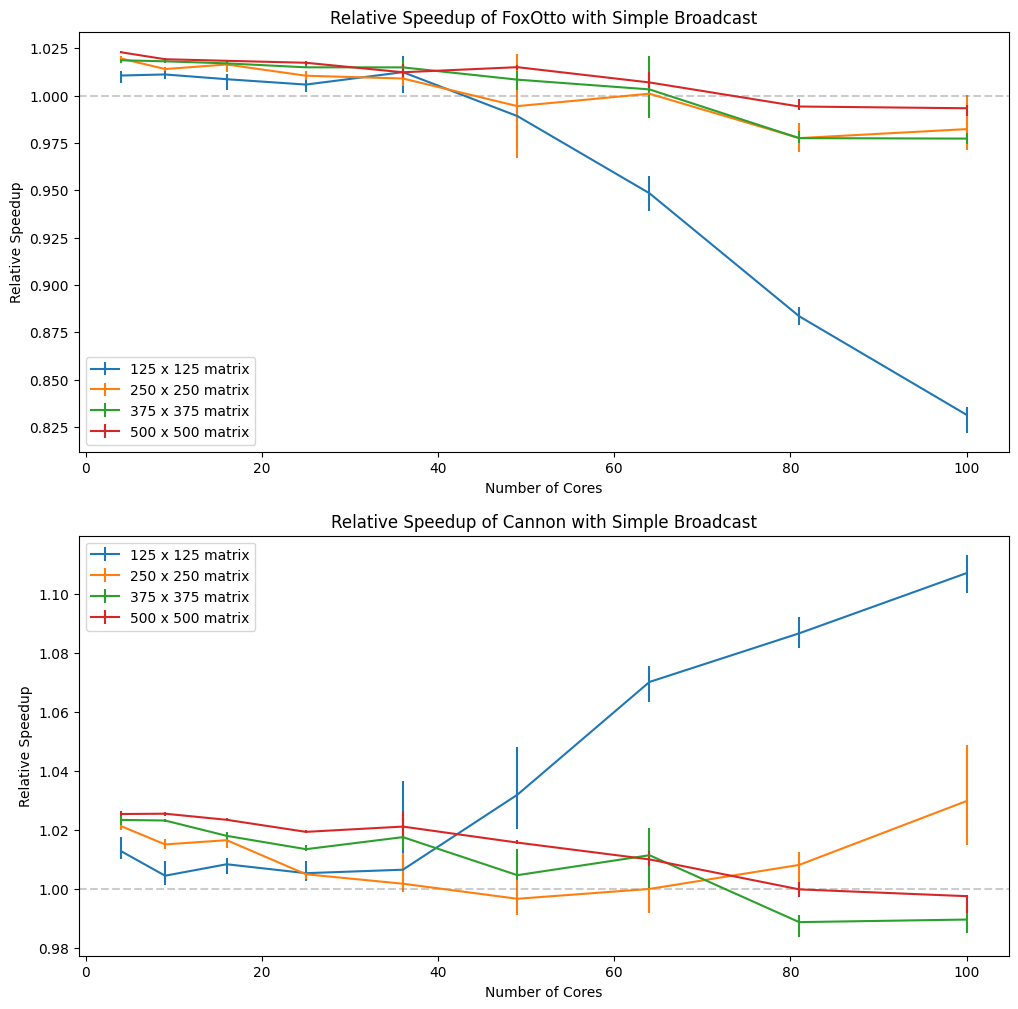

In [33]:
fig, axes = plt.subplots(len(relative), 1)
fig.set_size_inches(12, 6 * len(relative))

if len(relative) == 1:
    axes = [axes]

ax_num = 0

for relativeComm, name in zip(relative, ['FoxOtto','Cannon']):
    ax = axes[ax_num]
    ax.set_title('Relative Speedup of {} with Simple Broadcast'.format(name))
    for bench in relativeComm:
        x = [run['processor_size'] ** 2 for run in bench]
        y = [run['median'] for run in bench]
        lq = [run['lq'] for run in bench]
        uq = [run['uq'] for run in bench]
        ax.errorbar(x,y,[lq,uq], label="{} x {} matrix".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size'])))
    ax.set_ylabel('Relative Speedup')
    ax.set_xlabel('Number of Cores')
    ax.legend()
    ax.axhline(1, alpha=0.4, color='grey', linestyle='--')
    ax_num += 1

# Matrix2 Remote

In [22]:
groups = []
for mat in ['125','250','375','500']:
    with open('matrix2/matrix' + mat + '.json')as file:
        groups.append(json.load(file))

In [35]:
Hash = []
for group in groups:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
            Hash.append(bench['data'])

FoxOtto = []
for group in groups:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
            FoxOtto.append(bench['data'])

Cannon = []
for group in groups:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
            Cannon.append(bench['data'])

In [36]:
relativeFoxOtto = []
for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
    relativeBench = []
    for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
        relativeBench.append(relativeRun)
    relativeFoxOtto.append(relativeBench)

relativeCannon = []
for benchHash, benchCannon in zip(Hash, Cannon):
    relativeBench = []
    for runHash, runCannon in zip(benchHash, benchCannon):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
        relativeBench.append(relativeRun)
    relativeCannon.append(relativeBench)
relative = [relativeFoxOtto, relativeCannon]

In [37]:
for relativeComm in relative:
    for bench in relativeComm:
        for run in bench:
            narray = np.array(run['data'])
            run['std'] = np.std(narray)
            run['mean'] = np.mean(narray)
            run['median'] = np.median(narray)
            run['lq'] = run['median'] - np.quantile(narray,0.25)
            run['uq'] = np.quantile(narray,0.75) - run['median']

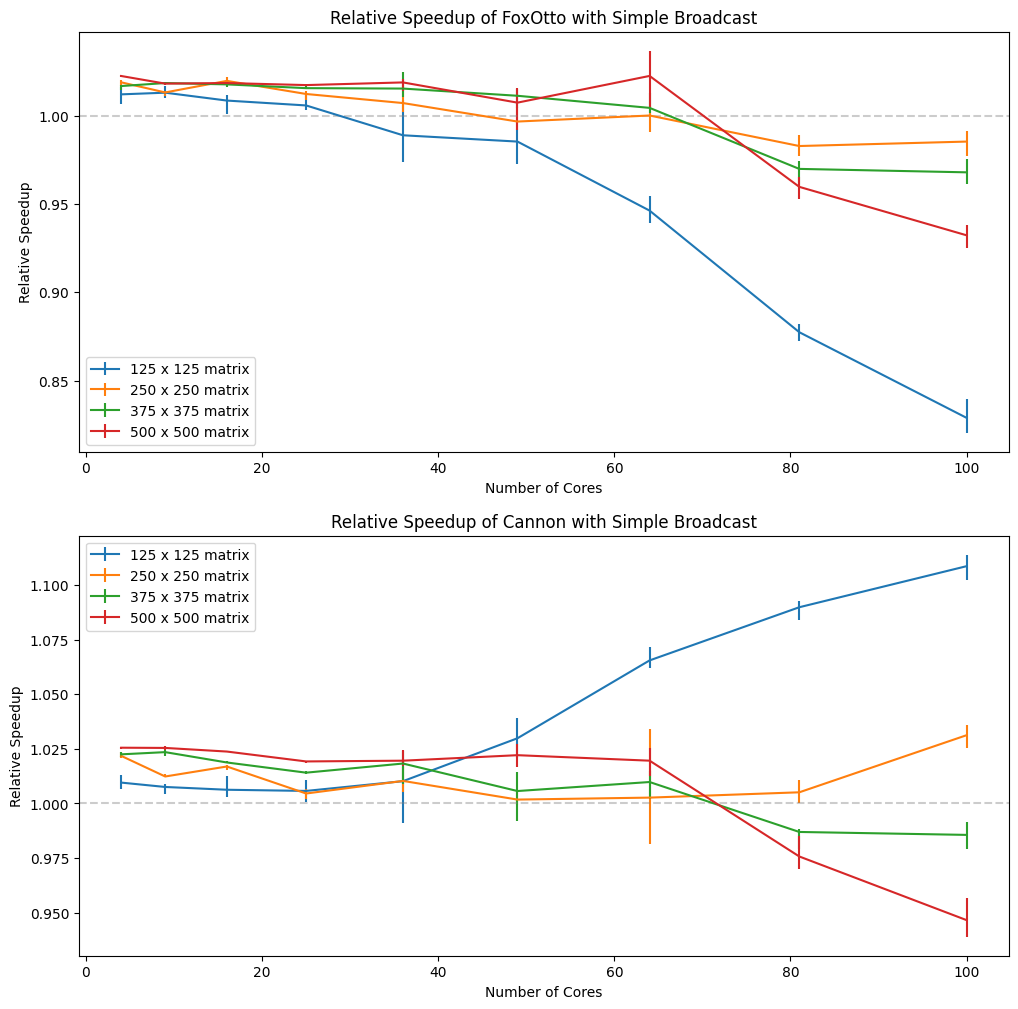

In [38]:
fig, axes = plt.subplots(len(relative), 1)
fig.set_size_inches(12, 6 * len(relative))

if len(relative) == 1:
    axes = [axes]

ax_num = 0

for relativeComm, name in zip(relative, ['FoxOtto','Cannon']):
    ax = axes[ax_num]
    ax.set_title('Relative Speedup of {} with Simple Broadcast'.format(name))
    for bench in relativeComm:
        x = [run['processor_size'] ** 2 for run in bench]
        y = [run['median'] for run in bench]
        lq = [run['lq'] for run in bench]
        uq = [run['uq'] for run in bench]
        ax.errorbar(x,y,[lq,uq], label="{} x {} matrix".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size'])))
    ax.set_ylabel('Relative Speedup')
    ax.set_xlabel('Number of Cores')
    ax.legend()
    ax.axhline(1, alpha=0.4, color='grey', linestyle='--')
    ax_num += 1

# Hardware Comparison

In [3]:
with open('thread_time/data_local2.json')as file:
    data = json.load(file)
local = data['data']

remote = []
for mat in ['125','250','375','500']:
    with open('matrix/matrix' + mat + '.json')as file:
        remote.append(json.load(file))

In [36]:
def add_stats(groups):
    for group in groups:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))

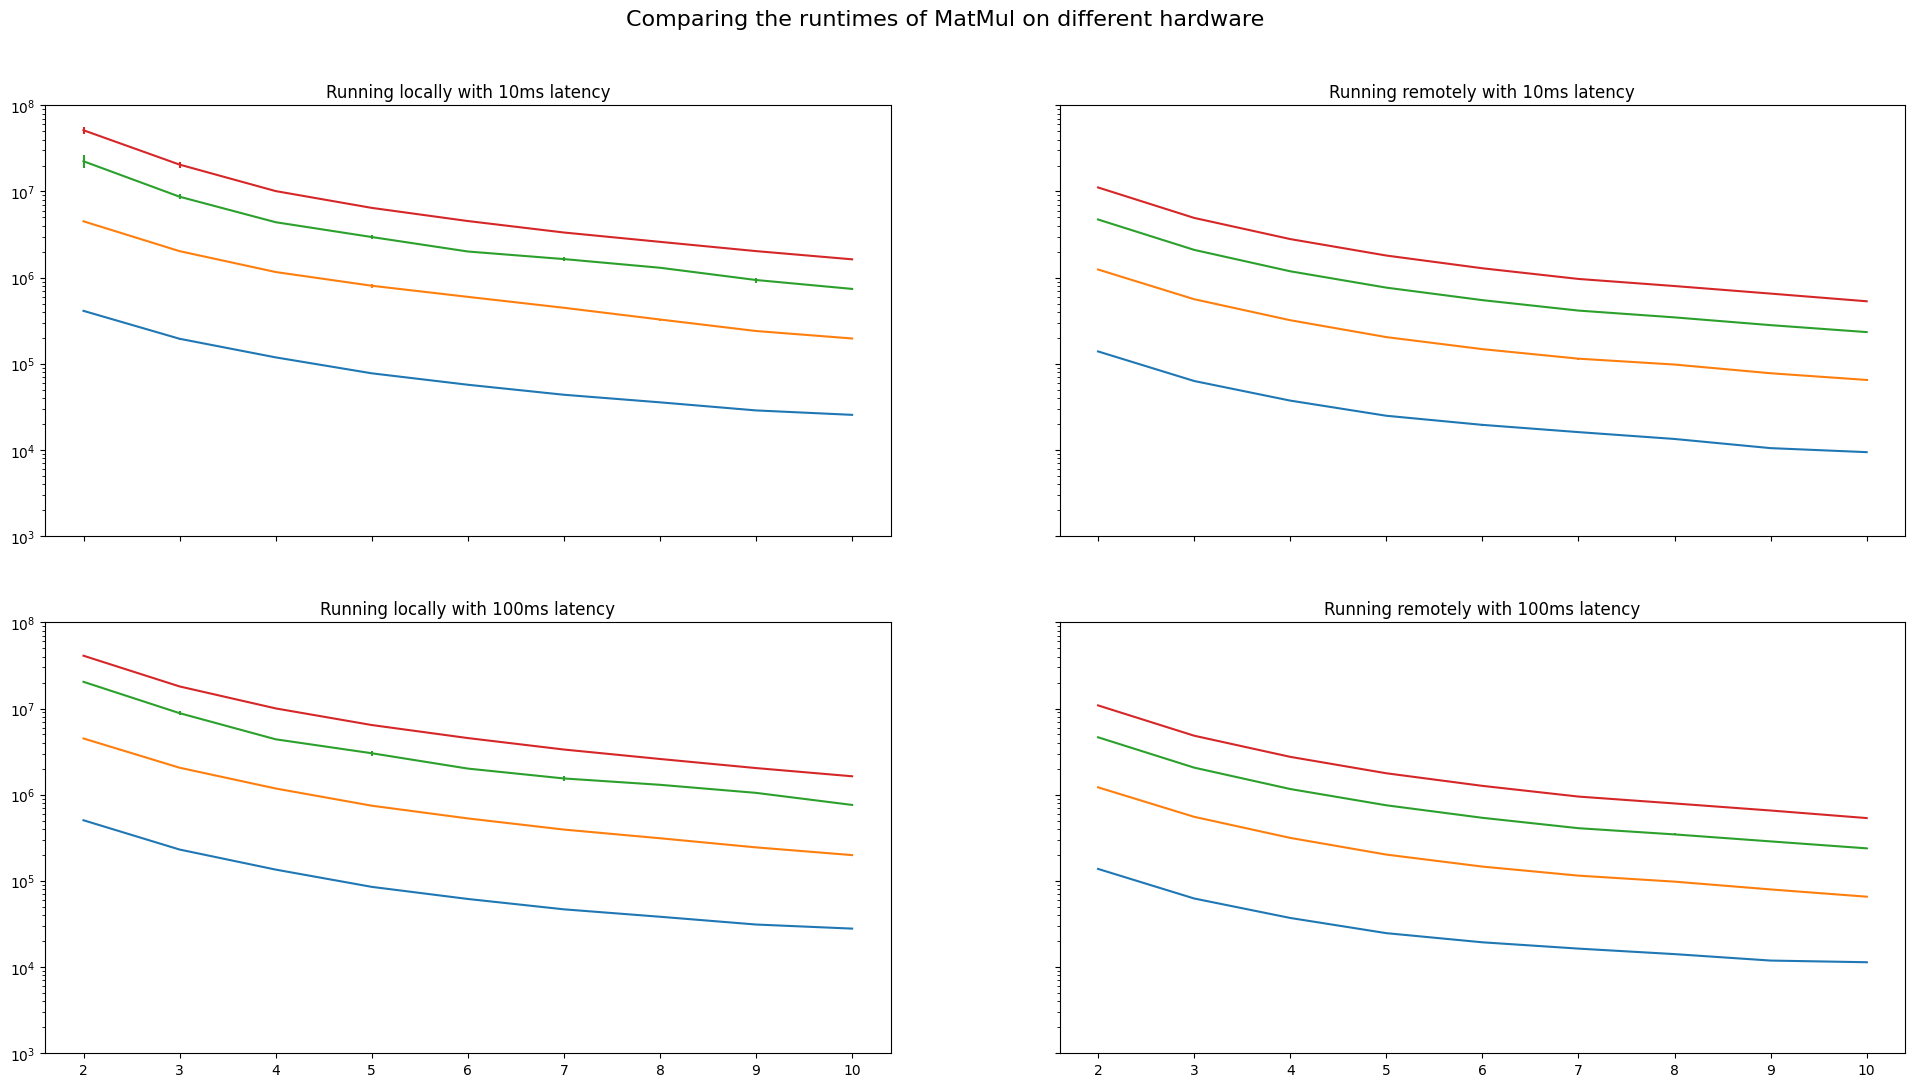

In [70]:
add_stats(local)
add_stats(remote)
    
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True)
fig.set_size_inches(24, 12)

axes[0][0].set_yscale('log',base=10)
axes[0][0].set_ylim(10**3,10**8)
fig.suptitle('Comparing the runtimes of MatMul on different hardware', fontsize=16)
fig.subplots_adjust(top=0.9)

for group in local:
    y_coord = 0;
    for bench,latency in zip(group['data'][0:2], [10,100]):
        ax = axes[y_coord][0]
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=str(bench['data'][0]['matrix_size']))
        ax.set_title(f'Running locally with {latency}ms latency')
        y_coord += 1

for group in remote:
    y_coord = 0;
    for bench,latency in zip(group['data'][0:2], [10,100]):
        ax = axes[y_coord][1]
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=str(bench['data'][0]['matrix_size']))
        ax.set_title(f'Running remotely with {latency}ms latency')
        y_coord += 1

# Matrix Core vs Dist

In [3]:
core = []
mat_sizes = [2**i for i in range(5, 9)]
for mat in mat_sizes:
    with open('matrix_core/matrix_core_' + str(mat) + '.json')as file:
        core.append(json.load(file))
dist = []
for mat in mat_sizes:
    with open('matrix_dist/matrix_dist_' + str(mat) + '.json')as file:
        dist.append(json.load(file))

In [4]:
def add_stats(groups):
    for group in groups:
        for bench in group:
            for run in bench:
                narray = np.array(run['data'])
                run['std'] = np.std(narray)
                run['mean'] = np.mean(narray)
                run['median'] = np.median(narray)
                run['lq'] = run['median'] - np.quantile(narray,0.25)
                run['uq'] = np.quantile(narray,0.75) - run['median']

In [5]:
def divide_group(groups):
    Hash = []
    FoxOtto = []
    Cannon = []
    for group in groups:
        for bench in group['data']:
            if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
                Hash.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
                FoxOtto.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
                Cannon.append(bench['data'])
    return Hash, FoxOtto, Cannon

In [6]:
def relative_group(groups):
    Hash, FoxOtto, Cannon = divide_group(groups)
    
    relativeFoxOtto = []
    for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
        relativeBench = []
        for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
            relativeBench.append(relativeRun)
        relativeFoxOtto.append(relativeBench)
    
    relativeCannon = []
    for benchHash, benchCannon in zip(Hash, Cannon):
        relativeBench = []
        for runHash, runCannon in zip(benchHash, benchCannon):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
            relativeBench.append(relativeRun)
        relativeCannon.append(relativeBench)
    return [relativeFoxOtto, relativeCannon]

In [7]:
core_rel = relative_group(core)
dist_rel = relative_group(dist)
add_stats(core_rel)
add_stats(dist_rel)

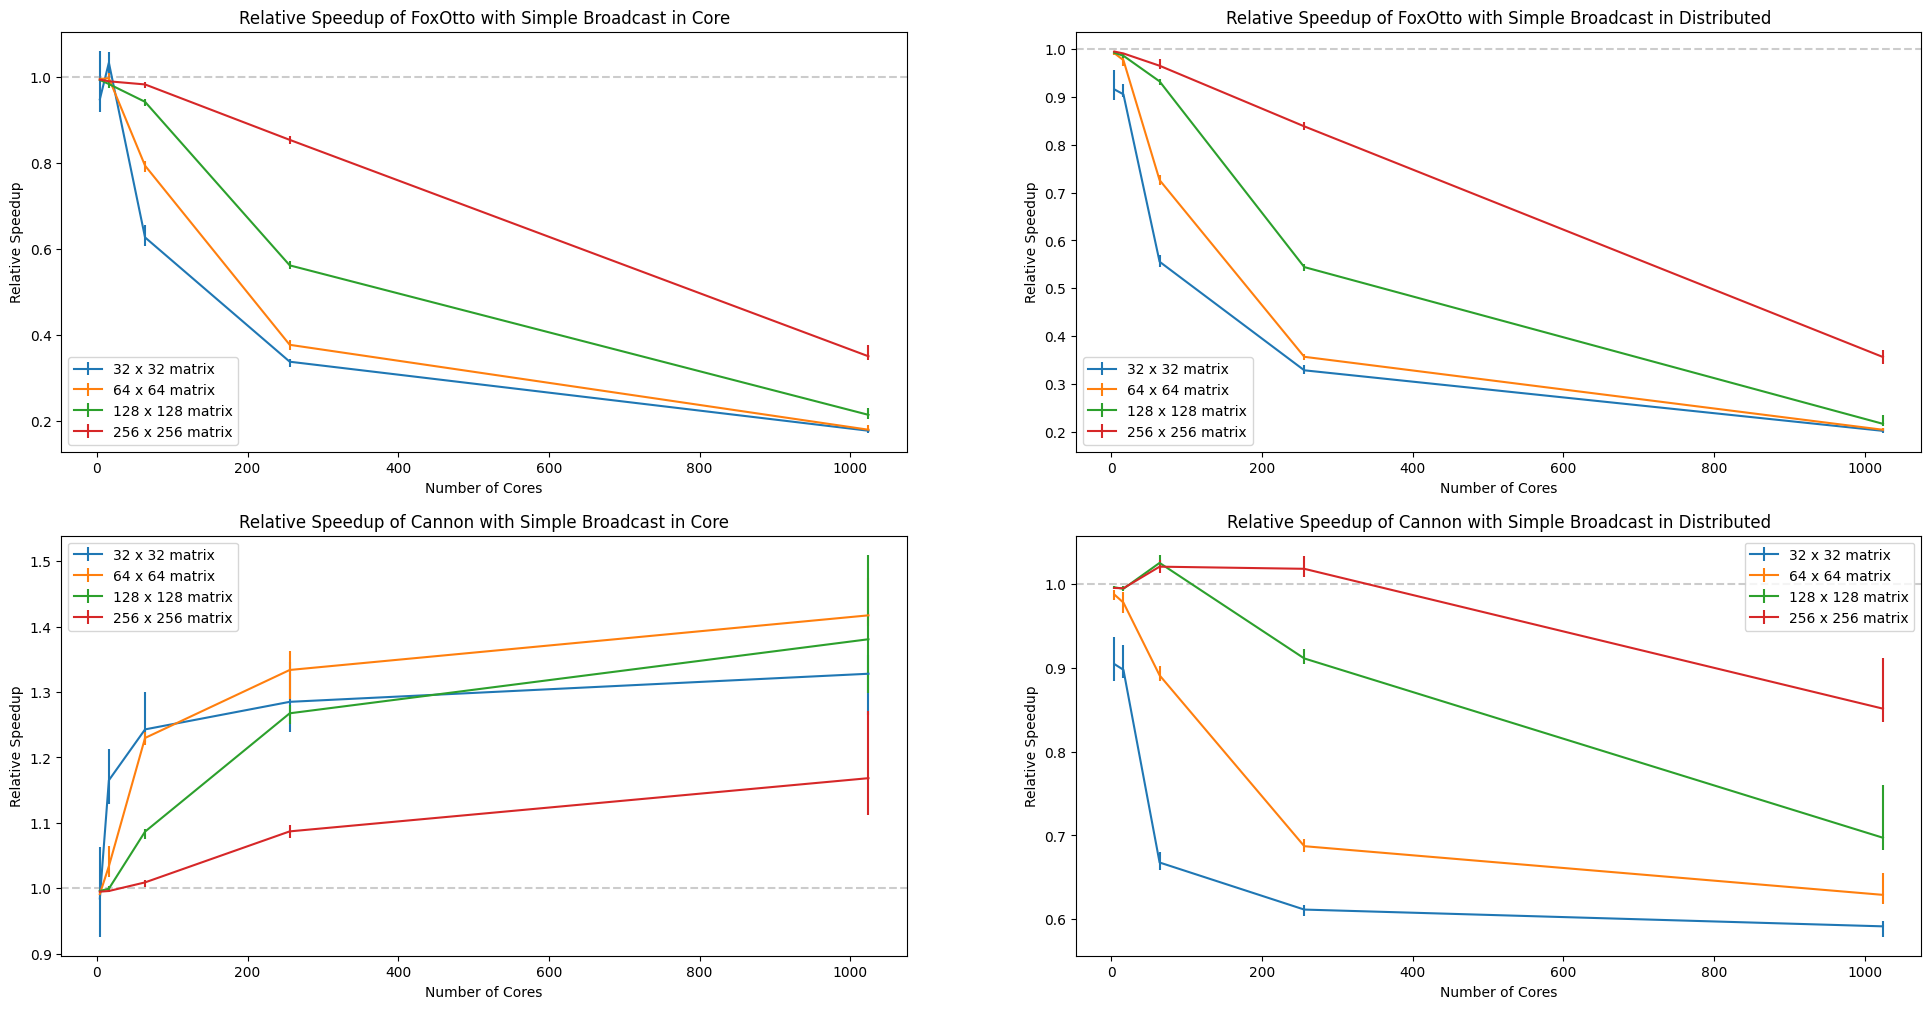

In [8]:
fig, axes = plt.subplots(len(core_rel), 2)
fig.set_size_inches(24, 6 * len(core_rel))

ax_num = 0
comm = ['FoxOtto','Cannon']

for relativeComm, name in zip(core_rel, comm):
    ax = axes[ax_num][0]
    ax.set_title('Relative Speedup of {} with Simple Broadcast in Core'.format(name))
    for bench in relativeComm:
        x = [run['processor_size'] ** 2 for run in bench]
        y = [run['median'] for run in bench]
        lq = [run['lq'] for run in bench]
        uq = [run['uq'] for run in bench]
        ax.errorbar(x,y,[lq,uq], label="{} x {} matrix".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size'])))
    ax.set_ylabel('Relative Speedup')
    ax.set_xlabel('Number of Cores')
    ax.legend()
    ax.axhline(1, alpha=0.4, color='grey', linestyle='--')
    ax_num += 1

ax_num = 0
for relativeComm, name in zip(dist_rel, comm):
    ax = axes[ax_num][1]
    ax.set_title('Relative Speedup of {} with Simple Broadcast in Distributed'.format(name))
    for bench in relativeComm:
        x = [run['processor_size'] ** 2 for run in bench]
        y = [run['median'] for run in bench]
        lq = [run['lq'] for run in bench]
        uq = [run['uq'] for run in bench]
        ax.errorbar(x,y,[lq,uq], label="{} x {} matrix".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size'])))
    ax.set_ylabel('Relative Speedup')
    ax.set_xlabel('Number of Cores')
    ax.legend()
    ax.axhline(1, alpha=0.4, color='grey', linestyle='--')
    ax_num += 1

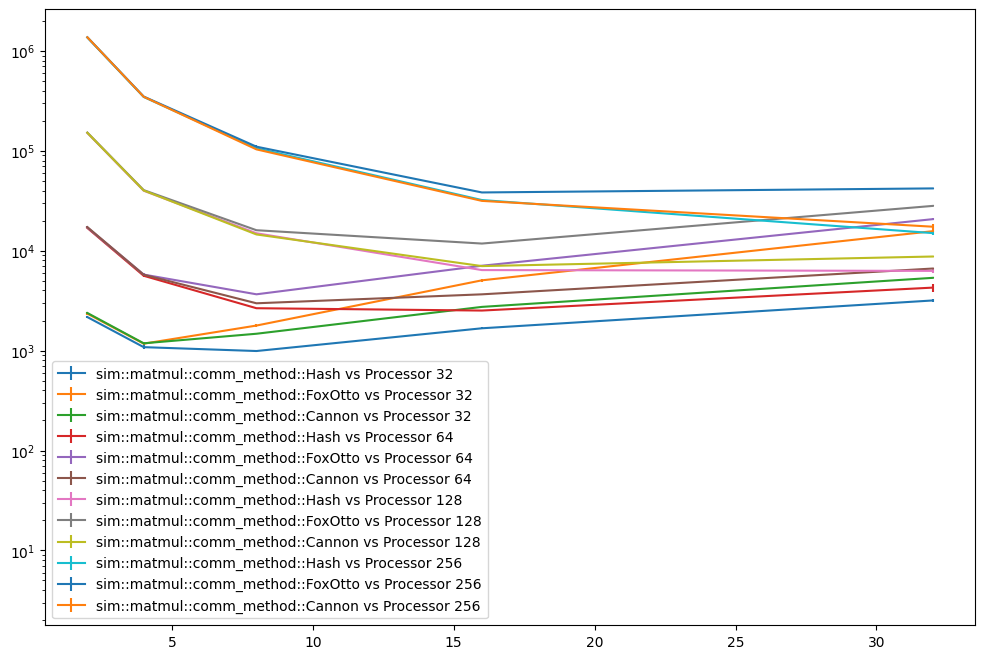

In [9]:
dist = []
for mat in mat_sizes:
    with open('matrix_dist/matrix_dist_' + str(mat) + '.json')as file:
        dist.append(json.load(file))
        
for group in dist:
    for bench in group['data']:
        for run in bench['data']:
            run['std'] = np.std(np.array(run['data']))
            run['mean'] = np.mean(np.array(run['data']))

fig, axes = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

ax_num = 0

for group in dist:
    ax = axes
    for bench in group['data']:
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
    ax.legend()
    ax.set_yscale('log',base=10)

# Latency

In [8]:
latency = []
latencies = [100**i for i in range(1,4)]
for mat in latencies:
    with open('latency/latency_' + str(mat) + '.json')as file:
        latency.append(json.load(file))

In [17]:
def add_stats(groups):
    for group in groups:
        for bench in group:
            for run in bench:
                narray = np.array(run['data'])
                run['std'] = np.std(narray)
                run['mean'] = np.mean(narray)
                run['median'] = np.median(narray)
                run['lq'] = run['median'] - np.quantile(narray,0.25)
                run['uq'] = np.quantile(narray,0.75) - run['median']

In [18]:
def divide_group(groups):
    Hash = []
    FoxOtto = []
    Cannon = []
    for group in groups:
        for bench in group['data']:
            if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
                Hash.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
                FoxOtto.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
                Cannon.append(bench['data'])
    return Hash, FoxOtto, Cannon

In [19]:
def relative_group(groups):
    Hash, FoxOtto, Cannon = divide_group(groups)
    
    relativeFoxOtto = []
    for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
        relativeBench = []
        for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
            relativeBench.append(relativeRun)
        relativeFoxOtto.append(relativeBench)
    
    relativeCannon = []
    for benchHash, benchCannon in zip(Hash, Cannon):
        relativeBench = []
        for runHash, runCannon in zip(benchHash, benchCannon):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
            relativeBench.append(relativeRun)
        relativeCannon.append(relativeBench)
    return [relativeFoxOtto, relativeCannon]

In [20]:
latency_rel = relative_group(latency)
add_stats(latency_rel)

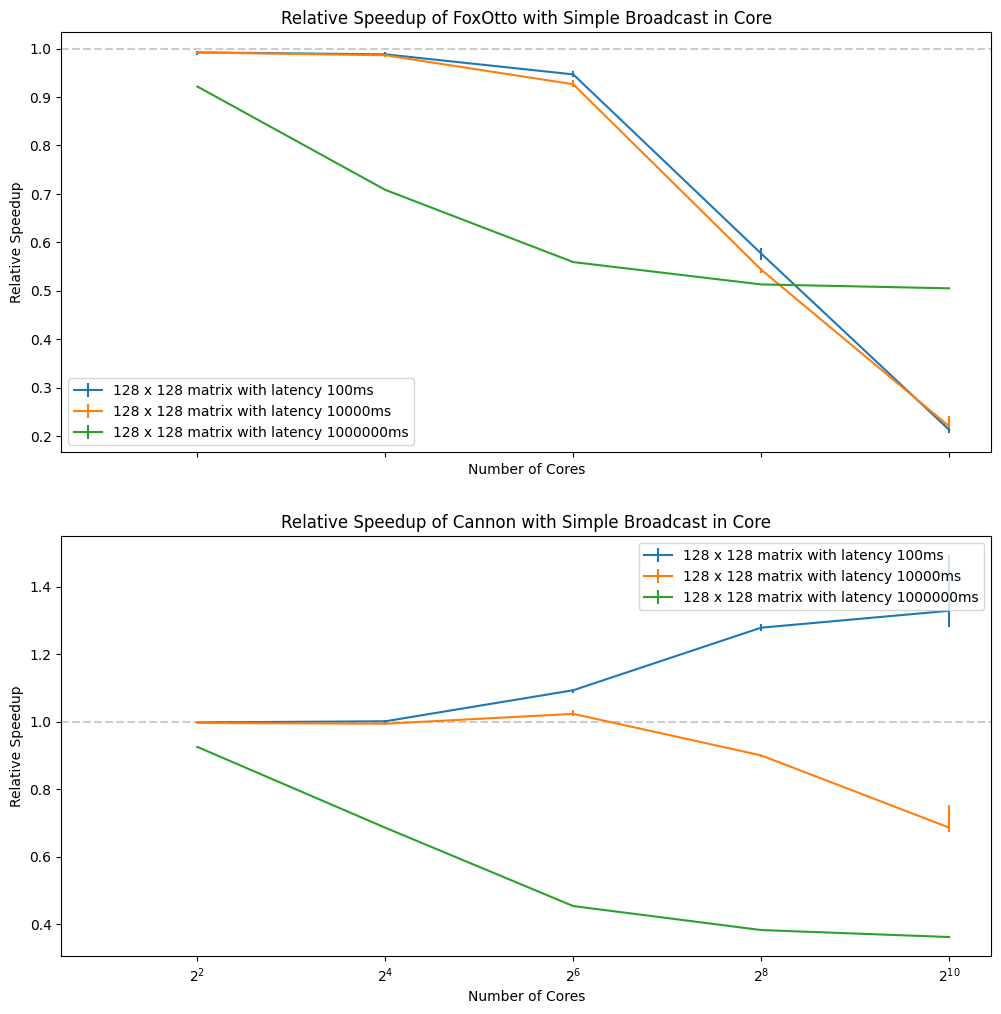

In [24]:
fig, axes = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(12, 12)

ax_num = 0
comm = ['FoxOtto','Cannon']

for relativeComm, name in zip(latency_rel, comm):
    ax = axes[ax_num]
    ax.set_title('Relative Speedup of {} with Simple Broadcast in Core'.format(name))
    for bench, lat in zip(relativeComm, [100,10000,1000000]):
        x = [run['processor_size'] ** 2 for run in bench]
        y = [run['median'] for run in bench]
        lq = [run['lq'] for run in bench]
        uq = [run['uq'] for run in bench]
        ax.errorbar(x,y,[lq,uq], label="{} x {} matrix with latency {}ms".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size']), str(lat)))
    ax.set_ylabel('Relative Speedup')
    ax.set_xlabel('Number of Cores')
    ax.set_xscale('log',base=2)
    ax.legend()
    ax.axhline(1, alpha=0.4, color='grey', linestyle='--')
    ax_num += 1

# Bandwidth

In [26]:
bandwidth = []
bandwidths = [100 * 1000**i for i in range(1,4)]
for band in bandwidths:
    with open('bandwidth/bandwidth_' + str(band) + '.json')as file:
        bandwidth.append(json.load(file))

In [27]:
def add_stats(groups):
    for group in groups:
        for bench in group:
            for run in bench:
                narray = np.array(run['data'])
                run['std'] = np.std(narray)
                run['mean'] = np.mean(narray)
                run['median'] = np.median(narray)
                run['lq'] = run['median'] - np.quantile(narray,0.25)
                run['uq'] = np.quantile(narray,0.75) - run['median']

In [28]:
def divide_group(groups):
    Hash = []
    FoxOtto = []
    Cannon = []
    for group in groups:
        for bench in group['data']:
            if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
                Hash.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
                FoxOtto.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
                Cannon.append(bench['data'])
    return Hash, FoxOtto, Cannon

In [29]:
def relative_group(groups):
    Hash, FoxOtto, Cannon = divide_group(groups)
    
    relativeFoxOtto = []
    for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
        relativeBench = []
        for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
            relativeBench.append(relativeRun)
        relativeFoxOtto.append(relativeBench)
    
    relativeCannon = []
    for benchHash, benchCannon in zip(Hash, Cannon):
        relativeBench = []
        for runHash, runCannon in zip(benchHash, benchCannon):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
            relativeBench.append(relativeRun)
        relativeCannon.append(relativeBench)
    return [relativeFoxOtto, relativeCannon]

In [30]:
bandwidth_rel = relative_group(bandwidth)
add_stats(bandwidth_rel)

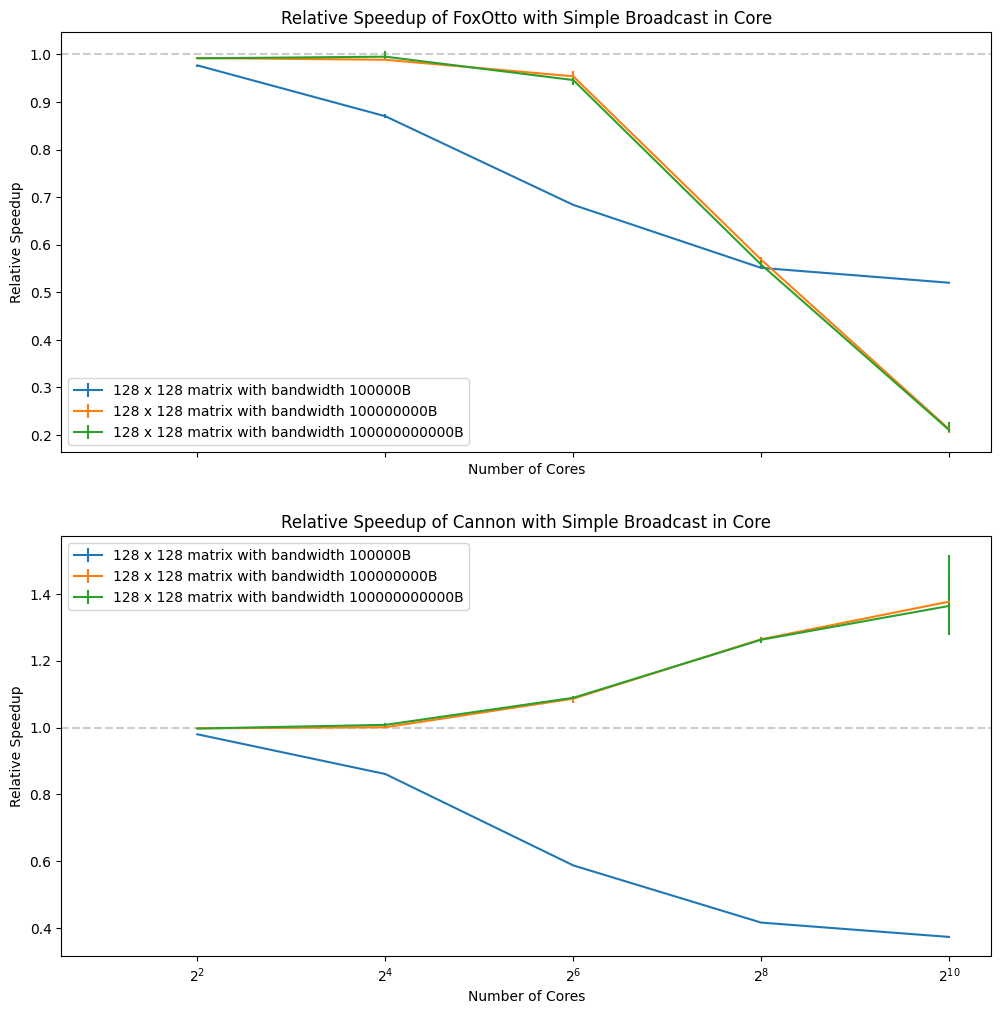

In [43]:
fig, axes = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(12, 12)

ax_num = 0
comm = ['FoxOtto','Cannon']

for relativeComm, name in zip(bandwidth_rel, comm):
    ax = axes[ax_num]
    ax.set_title('Relative Speedup of {} with Simple Broadcast in Core'.format(name))
    for bench, band in zip(relativeComm, bandwidths):
        x = [run['processor_size'] ** 2 for run in bench]
        y = [run['median'] for run in bench]
        lq = [run['lq'] for run in bench]
        uq = [run['uq'] for run in bench]
        ax.errorbar(x,y,[lq,uq], label="{} x {} matrix with bandwidth {}B".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size']), str(band)))
    ax.set_ylabel('Relative Speedup')
    ax.set_xlabel('Number of Cores')
    ax.set_xscale('log',base=2)
    ax.legend()
    ax.axhline(1, alpha=0.4, color='grey', linestyle='--')
    ax_num += 1

# Startup

In [36]:
startup = []
startups = [100**i for i in range(0,3)]
for start in startups:
    with open('startup/startup_' + str(start) + '.json')as file:
        startup.append(json.load(file))

In [37]:
def add_stats(groups):
    for group in groups:
        for bench in group:
            for run in bench:
                narray = np.array(run['data'])
                run['std'] = np.std(narray)
                run['mean'] = np.mean(narray)
                run['median'] = np.median(narray)
                run['lq'] = run['median'] - np.quantile(narray,0.25)
                run['uq'] = np.quantile(narray,0.75) - run['median']

In [38]:
def divide_group(groups):
    Hash = []
    FoxOtto = []
    Cannon = []
    for group in groups:
        for bench in group['data']:
            if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
                Hash.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
                FoxOtto.append(bench['data'])
            if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
                Cannon.append(bench['data'])
    return Hash, FoxOtto, Cannon

In [39]:
def relative_group(groups):
    Hash, FoxOtto, Cannon = divide_group(groups)
    
    relativeFoxOtto = []
    for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
        relativeBench = []
        for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
            relativeBench.append(relativeRun)
        relativeFoxOtto.append(relativeBench)
    
    relativeCannon = []
    for benchHash, benchCannon in zip(Hash, Cannon):
        relativeBench = []
        for runHash, runCannon in zip(benchHash, benchCannon):
            relativeRun = {}
            relativeRun['matrix_size'] = runHash['matrix_size']
            relativeRun['processor_size'] = runHash['processor_size']
            relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
            relativeBench.append(relativeRun)
        relativeCannon.append(relativeBench)
    return [relativeFoxOtto, relativeCannon]

In [40]:
startup_rel = relative_group(startup)
add_stats(startup_rel)

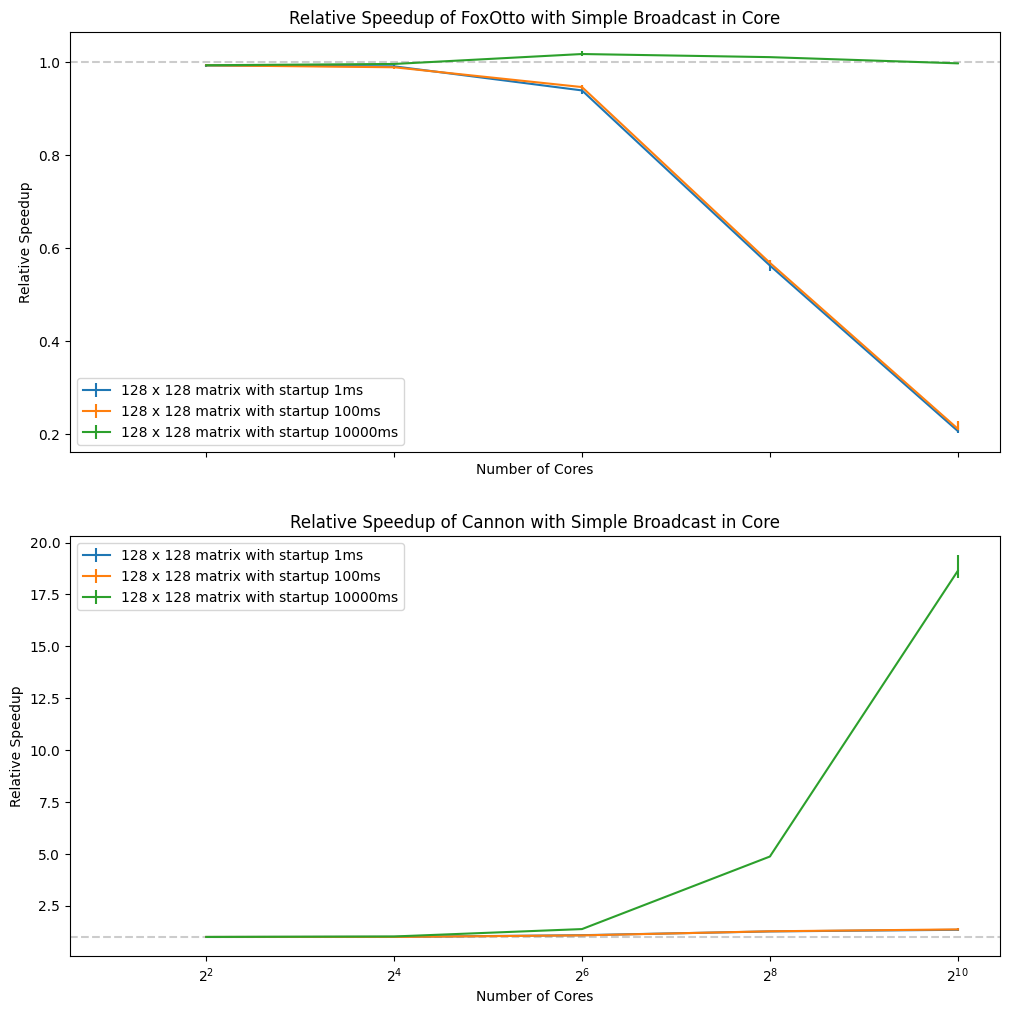

In [42]:
fig, axes = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(12, 12)

ax_num = 0
comm = ['FoxOtto','Cannon']

for relativeComm, name in zip(startup_rel, comm):
    ax = axes[ax_num]
    ax.set_title('Relative Speedup of {} with Simple Broadcast in Core'.format(name))
    for bench, band in zip(relativeComm, startups):
        x = [run['processor_size'] ** 2 for run in bench]
        y = [run['median'] for run in bench]
        lq = [run['lq'] for run in bench]
        uq = [run['uq'] for run in bench]
        ax.errorbar(x,y,[lq,uq], label="{} x {} matrix with startup {}ms".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size']), str(band)))
    ax.set_ylabel('Relative Speedup')
    ax.set_xlabel('Number of Cores')
    ax.set_xscale('log',base=2)
    ax.legend()
    ax.axhline(1, alpha=0.4, color='grey', linestyle='--')
    ax_num += 1